# Toxicity Analysis

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/toxicity](https://github.com/huseinzol05/Malaya/tree/master/example/toxicity).
    
</div>

<div class="alert alert-info">

This module trained on both standard and local (included social media) language structures, so it is save to use for both.
    
</div>

In [1]:
%%time
import malaya

CPU times: user 5.54 s, sys: 821 ms, total: 6.36 s
Wall time: 5.67 s


### Models accuracy

We use `sklearn.metrics.classification_report` for accuracy reporting, check at https://malaya.readthedocs.io/en/latest/models-accuracy.html#toxicity-analysis

### labels supported

Default labels for toxicity module.

In [2]:
malaya.toxicity.label

['severe toxic',
 'obscene',
 'identity attack',
 'insult',
 'threat',
 'asian',
 'atheist',
 'bisexual',
 'buddhist',
 'christian',
 'female',
 'heterosexual',
 'indian',
 'homosexual, gay or lesbian',
 'intellectual or learning disability',
 'male',
 'muslim',
 'other disability',
 'other gender',
 'other race or ethnicity',
 'other religion',
 'other sexual orientation',
 'physical disability',
 'psychiatric or mental illness',
 'transgender',
 'malay',
 'chinese']

In [3]:
string = 'Benda yg SALAH ni, jgn lah didebatkan. Yg SALAH xkan jadi betul. Ingat tu. Mcm mana kesat sekalipun org sampaikan mesej, dan memang benda tu salah, diam je. Xyah nk tunjuk kau open sangat nk tegur cara org lain berdakwah. '
another_string = 'melayu bodoh, dah la gay, sokong lgbt lagi, memang tak guna'
string1 = 'Sis, students from overseas were brought back because they are not in their countries which is if something happens to them, its not the other countries’ responsibility. Student dalam malaysia ni dah dlm tggjawab kerajaan. Mana part yg tak faham?'
string2 = 'Harap kerajaan tak bukak serentak. Slowly release week by week. Focus on economy related industries dulu'

### Load multinomial model

```python
def multinomial(**kwargs):
    """
    Load multinomial toxicity model.

    Returns
    -------
    result : malaya.model.ml.MultilabelBayes class
    """
```

In [9]:
model = malaya.toxicity.multinomial()

#### Predict batch of strings

```python
def predict(self, strings: List[str]):
    """
    classify list of strings.

    Parameters
    ----------
    strings: List[str]

    Returns
    -------
    result: List[str]
    """
```

In [6]:
model.predict([string])

[['severe toxic',
  'obscene',
  'identity attack',
  'insult',
  'indian',
  'malay',
  'chinese']]

#### Predict batch of strings with probability

```python
def predict_proba(self, strings: List[str]):
    """
    classify list of strings and return probability.

    Parameters
    ----------
    strings: List[str]

    Returns
    -------
    result: List[dict[str, float]]
    """
```

In [7]:
model.predict_proba([string])

[{'severe toxic': 0.997487040981572,
  'obscene': 0.9455379277616331,
  'identity attack': 0.8274699625500679,
  'insult': 0.5607594945618526,
  'threat': 0.024772971511820983,
  'asian': 0.0221240002096628,
  'atheist': 0.013774558637508741,
  'bisexual': 0.0024495807483865223,
  'buddhist': 0.004640372956039871,
  'christian': 0.052795457745171054,
  'female': 0.05289744129561423,
  'heterosexual': 0.008128507494633362,
  'indian': 0.9023637357823499,
  'homosexual, gay or lesbian': 0.04385664232535533,
  'intellectual or learning disability': 0.0014981591337876019,
  'male': 0.07976929455558882,
  'muslim': 0.08806420077375651,
  'other disability': 0.0,
  'other gender': 0.0,
  'other race or ethnicity': 0.0017014040578187566,
  'other religion': 0.0017333144620482767,
  'other sexual orientation': 0.00122606681013474,
  'physical disability': 0.001489522998169223,
  'psychiatric or mental illness': 0.027125947355667267,
  'transgender': 0.012349564445375391,
  'malay': 0.999190034

### List available Transformer models

In [4]:
malaya.toxicity.available_transformer()

,Size (MB),Quantized Size (MB),micro precision,micro recall,micro f1-score
bert,425.6,111.00,0.86098,0.77313,0.81469
tiny-bert,57.4,15.40,0.83535,0.79611,0.81526
albert,48.6,12.80,0.86054,0.76973,0.81261
tiny-albert,22.4,5.98,0.83535,0.79611,0.81526
xlnet,446.6,118.00,0.77904,0.83829,0.80758
alxlnet,46.8,13.30,0.83376,0.80221,0.81768
fastformer,446.6,118.00,0.88249,0.74826,0.80985
tiny-fastformer,77.3,19.60,0.85131,0.76620,0.80652


### Load Transformer model

```python
def transformer(model: str = 'xlnet', quantized: bool = False, **kwargs):
    """
    Load Transformer toxicity model.

    Parameters
    ----------
    model : str, optional (default='bert')
        Model architecture supported. Allowed values:

        * ``'bert'`` - Google BERT BASE parameters.
        * ``'tiny-bert'`` - Google BERT TINY parameters.
        * ``'albert'`` - Google ALBERT BASE parameters.
        * ``'tiny-albert'`` - Google ALBERT TINY parameters.
        * ``'xlnet'`` - Google XLNET BASE parameters.
        * ``'alxlnet'`` - Malaya ALXLNET BASE parameters.
        * ``'fastformer'`` - FastFormer BASE parameters.
        * ``'tiny-fastformer'`` - FastFormer TINY parameters.

    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model.
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result: model
        List of model classes:

        * if `bert` in model, will return `malaya.model.bert.SigmoidBERT`.
        * if `xlnet` in model, will return `malaya.model.xlnet.SigmoidXLNET`.
        * if `fastformer` in model, will return `malaya.model.fastformer.SigmoidFastFormer`.
    """
```

In [5]:
model = malaya.toxicity.transformer(model = 'alxlnet')

100%|██████████| 47.0/46.8 [01:05<00:00, 1.39s/MB]
184%|██████████| 1.00/0.54 [00:02<-1:59:59, 2.43s/MB]
135%|██████████| 1.00/0.74 [00:03<00:00, 3.48s/MB]


### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [ ]:
quantized_model = malaya.toxicity.transformer(model = 'alxlnet', quantized = True)

#### Predict batch of strings

```python
def predict(self, strings: List[str]):
    """
    classify list of strings.

    Parameters
    ----------
    strings: List[str]

    Returns
    -------
    result: List[List[str]]
    """
```

In [12]:
model.predict([string,another_string])

[['obscene'],
 ['severe toxic', 'obscene', 'identity attack', 'insult', 'malay']]

#### Predict batch of strings with probability

```python
def predict_proba(self, strings: List[str]):
    """
    classify list of strings and return probability.

    Parameters
    ----------
    strings : List[str]

    Returns
    -------
    result: List[dict[str, float]]
    """
```

In [14]:
model.predict_proba([string,another_string])

[{'severe toxic': 0.30419078,
  'obscene': 0.07300964,
  'identity attack': 0.02309686,
  'insult': 0.14792377,
  'threat': 0.0043829083,
  'asian': 0.00018724799,
  'atheist': 0.0013933778,
  'bisexual': 0.0005682409,
  'buddhist': 0.0006982982,
  'christian': 0.00010216236,
  'female': 0.0062876344,
  'heterosexual': 3.6597252e-05,
  'indian': 0.020283729,
  'homosexual, gay or lesbian': 0.0008122027,
  'intellectual or learning disability': 0.00015977025,
  'male': 0.0007993579,
  'muslim': 0.054483294,
  'other disability': 0.00017657876,
  'other gender': 0.00018069148,
  'other race or ethnicity': 6.273389e-05,
  'other religion': 0.0011053085,
  'other sexual orientation': 0.0013027787,
  'physical disability': 0.00010755658,
  'psychiatric or mental illness': 0.00078335404,
  'transgender': 0.00080055,
  'malay': 0.0033579469,
  'chinese': 0.20889702},
 {'severe toxic': 0.99571323,
  'obscene': 0.91805434,
  'identity attack': 0.95676684,
  'insult': 0.7667657,
  'threat': 0.02

In [15]:
quantized_model.predict_proba([string,another_string])

[{'severe toxic': 0.28386846,
  'obscene': 0.25873762,
  'identity attack': 0.021321118,
  'insult': 0.19023287,
  'threat': 0.005617261,
  'asian': 0.00022211671,
  'atheist': 0.000109523535,
  'bisexual': 0.0019034147,
  'buddhist': 0.00038090348,
  'christian': 0.0016773939,
  'female': 0.007807076,
  'heterosexual': 0.0001899302,
  'indian': 0.049388766,
  'homosexual, gay or lesbian': 0.00043603778,
  'intellectual or learning disability': 0.0012571216,
  'male': 0.0043218136,
  'muslim': 0.018054605,
  'other disability': 0.0011820793,
  'other gender': 0.00044164062,
  'other race or ethnicity': 0.00012764335,
  'other religion': 0.0009614825,
  'other sexual orientation': 0.0040558875,
  'physical disability': 0.0005840957,
  'psychiatric or mental illness': 0.0023525357,
  'transgender': 0.003135711,
  'malay': 0.0013717413,
  'chinese': 0.0051787198},
 {'severe toxic': 0.9966523,
  'obscene': 0.82459927,
  'identity attack': 0.97338796,
  'insult': 0.49216133,
  'threat': 0.0

#### Open toxicity visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

```python
def predict_words(
    self,
    string: str,
    method: str = 'last',
    bins_size: float = 0.05,
    visualization: bool = True,
):
    """
    classify words.

    Parameters
    ----------
    string : str
    method : str, optional (default='last')
        Attention layer supported. Allowed values:

        * ``'last'`` - attention from last layer.
        * ``'first'`` - attention from first layer.
        * ``'mean'`` - average attentions from all layers.
    bins_size: float, optional (default=0.05)
        default bins size for word distribution histogram.
    visualization: bool, optional (default=True)
        If True, it will open the visualization dashboard.

    Returns
    -------
    dictionary: results
    """
```


In [6]:
model.predict_words(another_string)

### Vectorize

Let say you want to visualize sentence / word level in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, strings: List[str], method: str = 'first'):
    """
    vectorize list of strings.

    Parameters
    ----------
    strings: List[str]
    method : str, optional (default='first')
        Vectorization layer supported. Allowed values:

        * ``'last'`` - vector from last sequence.
        * ``'first'`` - vector from first sequence.
        * ``'mean'`` - average vectors from all sequences.
        * ``'word'`` - average vectors based on tokens.

    Returns
    -------
    result: np.array
    """
```

#### Sentence level

In [8]:
texts = [string, another_string, string1, string2]
r = quantized_model.vectorize(texts, method = 'first')

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(r)
tsne.shape

(4, 2)

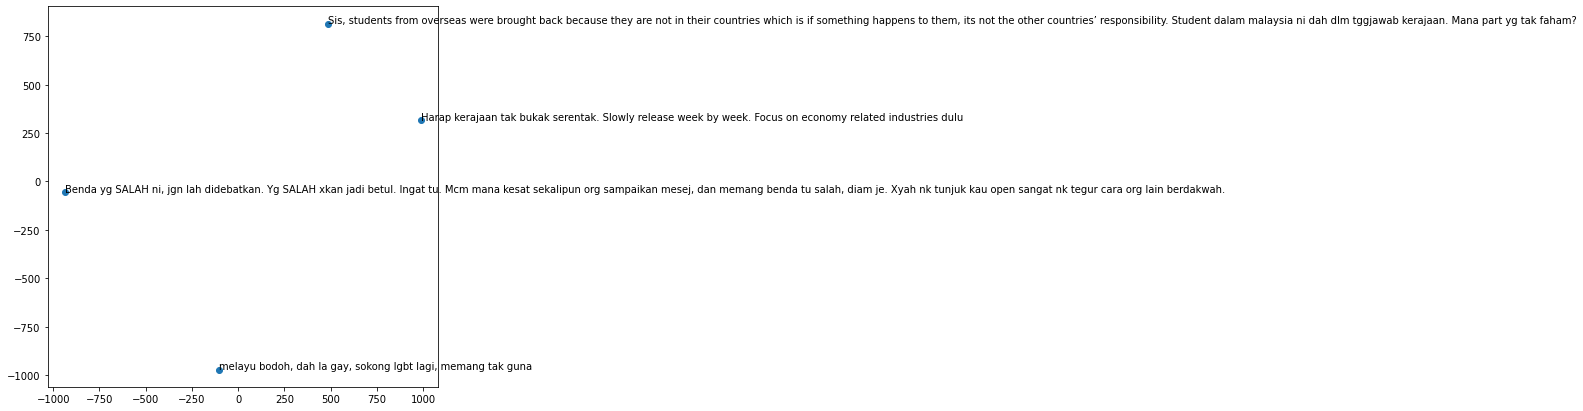

In [11]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = texts
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

#### Word level

In [17]:
r = quantized_model.vectorize(texts, method = 'word')

In [18]:
x, y = [], []
for row in r:
    x.extend([i[0] for i in row])
    y.extend([i[1] for i in row])

In [19]:
tsne = TSNE().fit_transform(y)
tsne.shape

(107, 2)

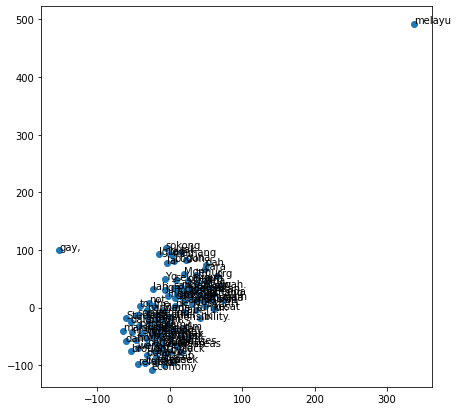

In [20]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = x
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

Pretty good, outliers are toxic words.

### Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [16]:
albert = malaya.toxicity.transformer(model = 'albert')

INFO:tensorflow:loading sentence piece model


In [18]:
malaya.stack.predict_stack([model, albert], [another_string])

[{'severe toxic': 0.9968317,
  'obscene': 0.43022493,
  'identity attack': 0.90531594,
  'insult': 0.42289576,
  'threat': 0.0058603976,
  'asian': 0.000983668,
  'atheist': 0.0005495089,
  'bisexual': 0.0009623809,
  'buddhist': 0.0003632398,
  'christian': 0.0018632574,
  'female': 0.006050684,
  'heterosexual': 0.0025569045,
  'indian': 0.0056869243,
  'homosexual, gay or lesbian': 0.012232827,
  'intellectual or learning disability': 0.00091394753,
  'male': 0.011594971,
  'muslim': 0.0042621437,
  'other disability': 0.00027529505,
  'other gender': 0.0010361207,
  'other race or ethnicity': 0.0012320877,
  'other religion': 0.00091365684,
  'other sexual orientation': 0.0027996385,
  'physical disability': 0.00010540871,
  'psychiatric or mental illness': 0.000815311,
  'transgender': 0.0016718076,
  'malay': 0.96644485,
  'chinese': 0.05199418}]